In [1]:
from tflite_runtime.interpreter import Interpreter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_test = np.genfromtxt('X_test.csv', delimiter=',')
y_test = np.genfromtxt('y_test.csv', delimiter=',')

In [3]:
y_test.shape

(184, 3832)

In [4]:
np.size(X_test[3])

3832

In [5]:
idx = 10



interpreter = Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_data = np.array([X_test[idx]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[[0.01401053 0.02377761 0.02922015 ... 0.         0.         0.        ]]


In [6]:
output = output_data.reshape(1,-1)
output.shape

(1, 3832)

In [7]:
y_test[0].shape

(3832,)

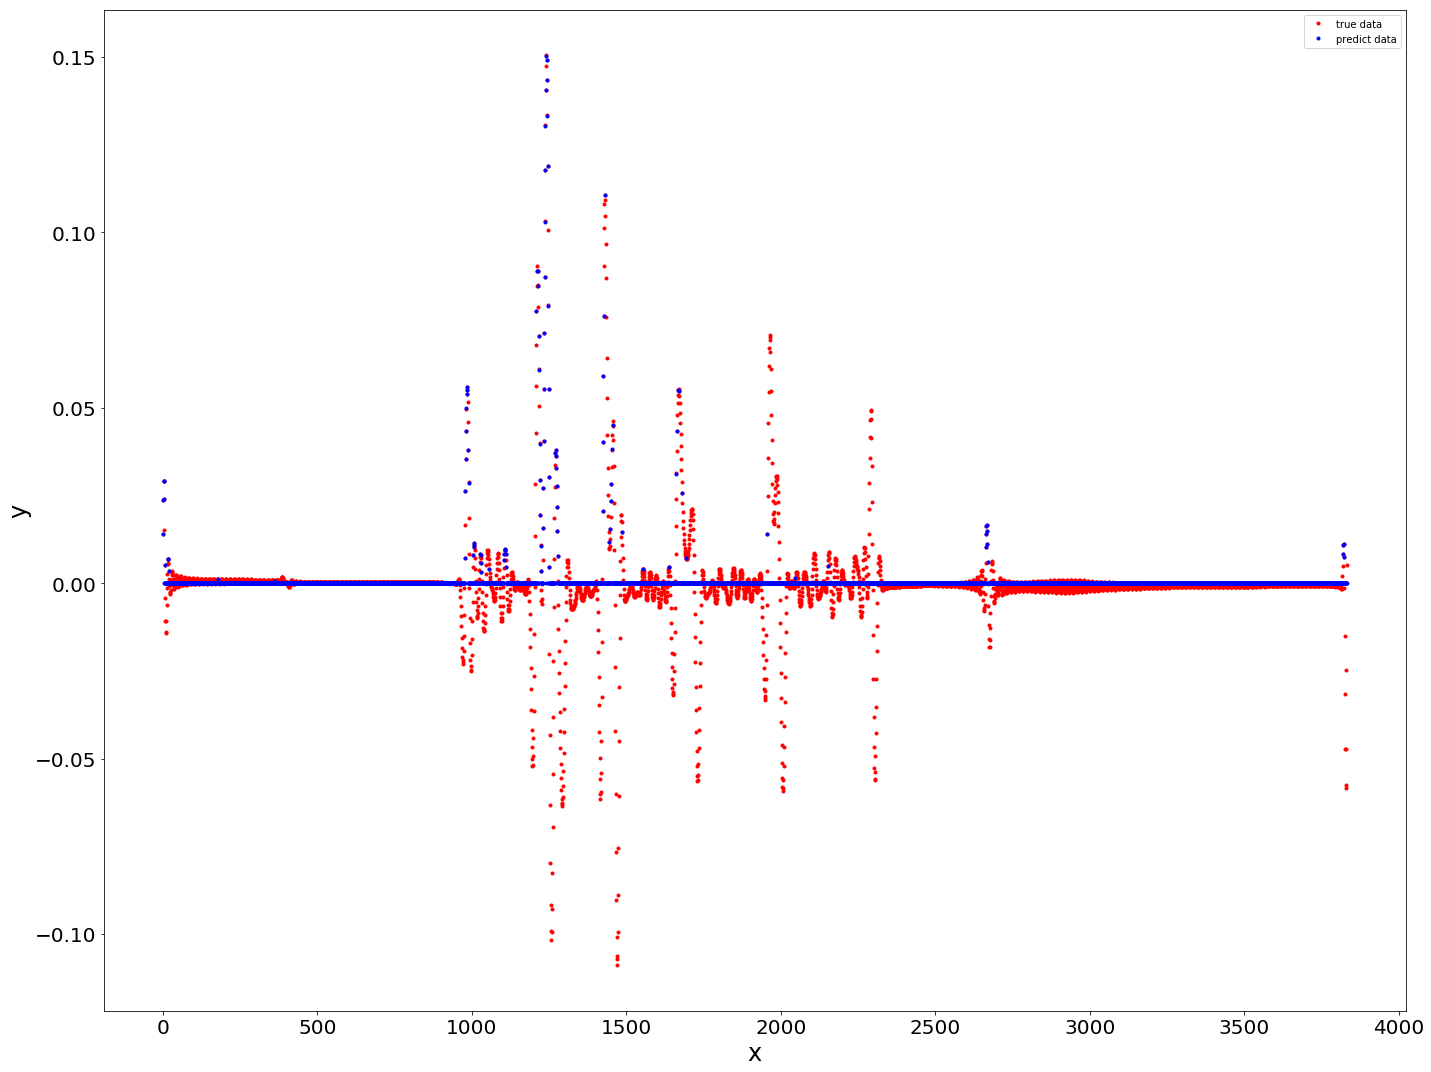

In [8]:
plt.figure(figsize=(20,15))
plt.plot(range(0,3832,1),y_test[idx],'r.',label="true data")
plt.plot(range(0,3832,1),output[0],'b.',label='predict data')

plt.xlabel('x',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()